### AI BOOK SUMMARIZER

In [15]:
!git add README.md
!git commit -m "Overwrite README with local version"
!git push origin main --force


[main 9fc8169] Overwrite README with local version
Enumerating objects: 16, done.
Counting objects: 100% (16/16), done.
Delta compression using up to 2 threads
Compressing objects: 100% (15/15), done.
Writing objects: 100% (16/16), 2.15 KiB | 95.00 KiB/s, done.
Total 16 (delta 5), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (5/5), done.
To https://github.com/CurvedShotz/AI_PDF_SUMMARIZER.git
 + 2614910...9fc8169 main -> main (forced update)


In [4]:
from google.colab import userdata
GITHUB_TOKEN = userdata.get('GITHUB_TOKEN')

!git config --global user.name "CurvedShotz"
!git config --global user.email "comfortolowe3@gmail.com"

# Set remote using token from secrets
repo_url = f"https://{GITHUB_TOKEN}@github.com/CurvedShotz/AI_PDF_SUMMARIZER.git"
!git remote add origin {repo_url}



error: remote origin already exists.


In [4]:
!git add .
!git commit -m "Initial commit from Colab"
!git push origin main

error: open("notebooks/outputs/Copy of summaries.md.gdoc"): Operation not supported
error: unable to index file 'notebooks/outputs/Copy of summaries.md.gdoc'
fatal: adding files failed
On branch main
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   README.md

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	notebooks/

no changes added to commit (use "git add" and/or "git commit -a")
To https://github.com/CurvedShotz/AI_PDF_SUMMARIZER.git
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://github.com/CurvedShotz/AI_PDF_SUMMARIZER.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') befo

In [ ]:
!pip install transformers textblob pymupdf


In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/AI_Book_Summary/


Mounted at /content/drive
/content/drive/MyDrive/AI_Book_Summary


#### - PDF EXTRACTION


In [ ]:
import fitz  # PyMuPDF
from transformers import pipeline
from textblob import TextBlob
import pandas as pd

# --- PDF Extraction ---
def extract_pages(pdf_path):
    doc = fitz.open(pdf_path)
    chapters = []
    for i, page in enumerate(doc):
        text = page.get_text().strip()
        # Skip empty or very short metadata-like pages
        if len(text.split()) > 20:
            chapters.append((f"Page {i+1}", text))
    return chapters

FUNCTION FOR SUMMARIZING EACH CHAPTER

In [ ]:
# --- Summarizer (better model) ---
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

def summarize_text(text, chunk_size=500):
    words = text.split()
    if len(words) < 30:
        return text  # too short to summarize

    # Split into chunks if text is too long
    summaries = []
    for i in range(0, len(words), chunk_size):
        chunk = " ".join(words[i:i+chunk_size])
        out = summarizer(chunk, max_new_tokens=120, min_length=40, do_sample=False)
        summaries.append(out[0]['summary_text'])
    return " ".join(summaries)


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


SENTIMENT ANALYSIS WITH TEXTBLOB

In [ ]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity


RUNNING THE CODE AND SAVING IT

In [ ]:
# --- Pipeline ---
pdf_path = './notebooks/data/The_Stranger_-_Albert_Camus.pdf'
chapters = extract_pages(pdf_path)

results = []
for title, text in chapters:
    print(f"Processing {title} ({len(text.split())} words)...")
    summary = summarize_text(text)
    sentiment = get_sentiment(summary)
    results.append({
        "page": title,
        "summary": summary,
        "sentiment": sentiment
    })

# --- Save ---
df = pd.DataFrame(results)
df.to_csv("./notebooks/outputs/summaries2.csv", index=False)
df.to_markdown("./notebooks/outputs/summaries2.md", index=False)  # extra clean format
df.head()

Processing Page 4 (112 words)...


Your max_length is set to 142, but your input_length is only 53. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


Processing Page 5 (35 words)...
Processing Page 6 (108 words)...
Processing Page 7 (186 words)...
Processing Page 8 (301 words)...
Processing Page 9 (265 words)...
Processing Page 13 (212 words)...
Processing Page 14 (325 words)...
Processing Page 15 (311 words)...
Processing Page 16 (297 words)...
Processing Page 17 (299 words)...
Processing Page 18 (315 words)...
Processing Page 19 (328 words)...
Processing Page 20 (301 words)...
Processing Page 21 (309 words)...
Processing Page 22 (312 words)...
Processing Page 23 (295 words)...
Processing Page 24 (305 words)...
Processing Page 25 (307 words)...
Processing Page 26 (321 words)...
Processing Page 27 (322 words)...
Processing Page 28 (169 words)...
Processing Page 29 (225 words)...
Processing Page 30 (338 words)...
Processing Page 31 (328 words)...
Processing Page 32 (295 words)...
Processing Page 33 (292 words)...
Processing Page 34 (285 words)...
Processing Page 35 (225 words)...
Processing Page 36 (317 words)...
Processing Page 37 (

Your max_length is set to 142, but your input_length is only 92. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)


Processing Page 56 (74 words)...
Processing Page 57 (230 words)...
Processing Page 58 (295 words)...
Processing Page 59 (289 words)...
Processing Page 60 (318 words)...
Processing Page 61 (305 words)...
Processing Page 62 (299 words)...
Processing Page 63 (310 words)...
Processing Page 64 (289 words)...
Processing Page 65 (295 words)...
Processing Page 66 (305 words)...
Processing Page 67 (311 words)...
Processing Page 68 (332 words)...
Processing Page 69 (316 words)...
Processing Page 73 (213 words)...
Processing Page 74 (309 words)...
Processing Page 75 (323 words)...
Processing Page 76 (311 words)...
Processing Page 77 (320 words)...
Processing Page 78 (324 words)...
Processing Page 79 (338 words)...
Processing Page 80 (310 words)...


Your max_length is set to 142, but your input_length is only 98. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)


Processing Page 81 (80 words)...
Processing Page 82 (238 words)...
Processing Page 83 (309 words)...
Processing Page 84 (276 words)...
Processing Page 85 (323 words)...
Processing Page 86 (312 words)...
Processing Page 87 (328 words)...
Processing Page 88 (295 words)...
Processing Page 89 (314 words)...
Processing Page 90 (327 words)...
Processing Page 91 (222 words)...
Processing Page 92 (211 words)...
Processing Page 93 (323 words)...
Processing Page 94 (309 words)...
Processing Page 95 (315 words)...
Processing Page 96 (293 words)...
Processing Page 97 (290 words)...
Processing Page 98 (301 words)...
Processing Page 99 (308 words)...
Processing Page 100 (314 words)...
Processing Page 101 (316 words)...
Processing Page 102 (339 words)...
Processing Page 103 (310 words)...
Processing Page 104 (305 words)...
Processing Page 105 (288 words)...
Processing Page 106 (311 words)...
Processing Page 107 (233 words)...
Processing Page 108 (212 words)...
Processing Page 109 (298 words)...
Proce

Your max_length is set to 142, but your input_length is only 78. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=39)


Processing Page 133 (67 words)...
Processing Page 135 (246 words)...


Your max_length is set to 142, but your input_length is only 110. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)


Processing Page 137 (80 words)...


,page,summary,sentiment
0,Page 4,Awarded the Nobel Prize for Literature in 1957...,0.000000
1,Page 5,The Stranger by Albert Camus is one of the mos...,0.309091
2,Page 6,First published in French as r: Etrarzger by L...,0.125000
3,Page 7,"Despite appearances, neither Camus nor Meursau...",0.025000
4,Page 8,Gilbert gave the novel a consistency and voice...,0.104762


from matplotlib import pyplot as plt
_df_0['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('page').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('summary').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['sentiment'].plot(kind='line', figsize=(8, 4), title='sentiment')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['summary'].value_counts()
    for x_label, grp in _df_4.groupby('page')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('page')
_ = plt.ylabel('summary')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['page'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='sentiment', y='page', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['summary'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='sentiment', y='summary', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

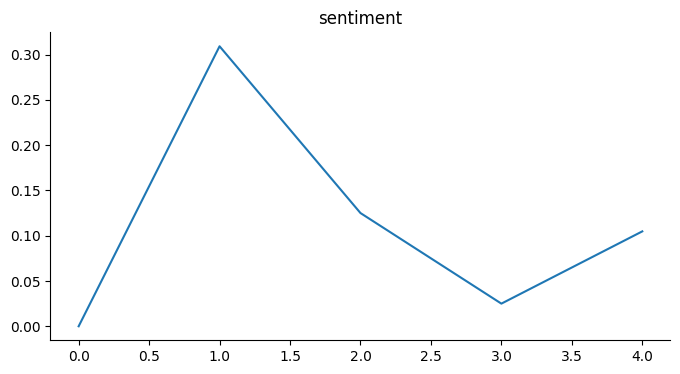

In [ ]:
from matplotlib import pyplot as plt
_df_3['sentiment'].plot(kind='line', figsize=(8, 4), title='sentiment')
plt.gca().spines[['top', 'right']].set_visible(False)

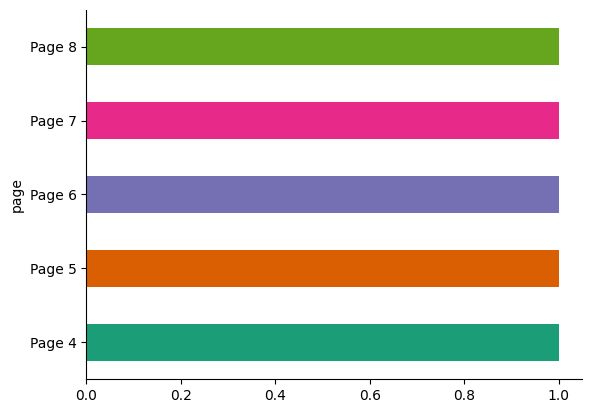

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('page').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)